In [1]:
import sys
import xml.etree.ElementTree as ET
from collections import Counter
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
from IPython.display import Video
import torch
import torchvision
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms.functional import to_pil_image
from torchvision.utils import draw_bounding_boxes, make_grid

In [2]:
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---")
print("CV2 version : ", cv2.__version__)
print("torch version : ", torch.__version__)
print("torchvision version : ", torchvision.__version__)

Platform: win32
Python version: 3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]
---
CV2 version :  4.12.0
torch version :  2.5.1
torchvision version :  0.20.1


In [5]:
video_dir = Path("data_video")
video_name = "enjoyment_video.mp4"
video_path = video_dir / video_name

print(video_path)

data_video\enjoyment_video.mp4


In [6]:
video_capture = cv2.VideoCapture(video_path)

if not video_capture.isOpened():
    print("Error: Could not open video.")
else:
    frame_rate = video_capture.get(cv2.CAP_PROP_FPS)
    frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Frame rate: {frame_rate}")
    print(f"Total number of frames: {frame_count:,}")

Frame rate: 30.0
Total number of frames: 1,099


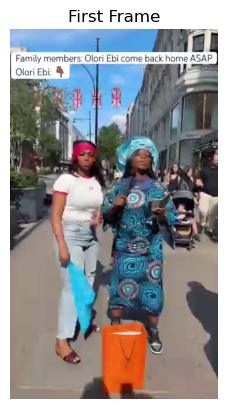

In [7]:
success, first_frame = video_capture.read()
if success:
    plt.imshow(cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB))
    plt.title("First Frame")
    plt.axis("off")
    plt.show()
else:
    print("Error: Could not read frame.")

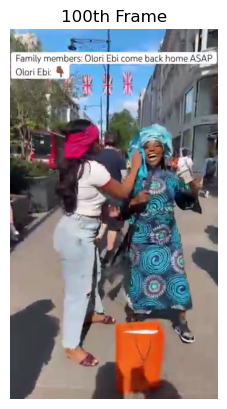

In [9]:
video_capture.set(cv2.CAP_PROP_POS_FRAMES, 100)
success, later_frame = video_capture.read()
if success:
    plt.imshow(cv2.cvtColor(later_frame, cv2.COLOR_BGR2RGB))
    plt.title("100th Frame")
    plt.axis("off")
    plt.show()
else:
    print("Error: Could not read frame.")

In [10]:
frames_dir = video_dir / "pulled_frames"
frames_dir.mkdir(exist_ok=True)

In [11]:
frame_count = 0

while True:
    success, frame = video_capture.read()
    if not success:
        break

    # Save frames at the frame_rate
    if frame_count % frame_rate == 0:
        frame_path = frames_dir / f"frame_{frame_count}.jpg"
        cv2.imwrite(frame_path, frame)

    frame_count += 1

video_capture.release()

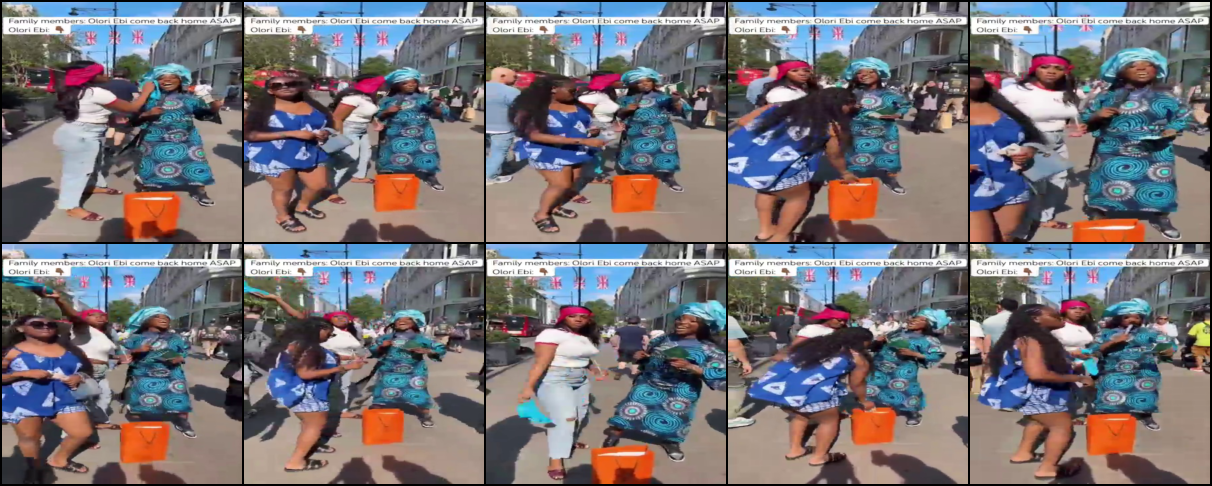

In [12]:
def display_sample_images(dir_path, sample=5):
    image_list = []
    images = sorted(dir_path.iterdir())
    if images:
        sample_images = images[:sample]
        for sample_image in sample_images:
            image = read_image(str(sample_image))
            resize_transform = transforms.Resize((240, 240))
            image = resize_transform(image)
            image_list.append(image)
    grid = make_grid(image_list, nrow=5)
    image = to_pil_image(grid)
    return image


display_sample_images(frames_dir, sample=10)